# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = 0.005
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

### GPU記憶體不夠，用keras.backend.clear_session()也無法釋放，只好不用迴圈分開寫

## SGD

In [7]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 90us/step - loss: 2.1743 - acc: 0.2238 - val_loss: 2.0656 - val_acc: 0.2761
Epoch 2/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.9985 - acc: 0.3042 - val_loss: 1.9512 - val_acc: 0.3074
Epoch 3/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.9133 - acc: 0.3315 - val_loss: 1.9071 - val_acc: 0.3216
Epoch 4/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.8603 - acc: 0.3489 - val_loss: 1.8443 - val_acc: 0.3511
Epoch 5/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.8218 - acc: 0.3637 - val_loss: 1.8032 - val_acc: 0.3696
Epoch 6/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.7897 - acc: 0.3762 - val_loss: 1.7890 - val_acc: 0.3703
Epoch 7/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.7626 - acc: 0.3847 - val_loss: 1.7566 - val_acc

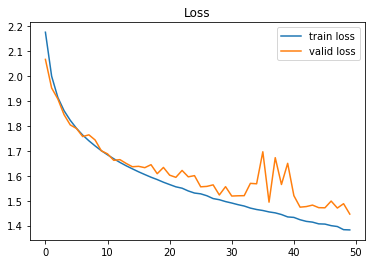

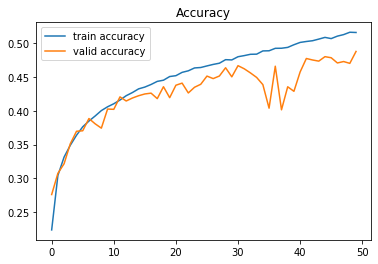

In [14]:
import matplotlib.pyplot as plt
"""
將實驗結果繪出
"""
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## RMSprop

In [14]:
LEARNING_RATE = 0.00005

In [15]:
model2 = build_mlp(input_shape=x_train.shape[1:])
model2.summary()
optimizer = keras.optimizers.RMSprop(lr=LEARNING_RATE)
model2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [16]:
model2.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.9775 - acc: 0.2982 - val_loss: 1.8482 - val_acc: 0.3477
Epoch 2/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.8113 - acc: 0.3615 - val_loss: 1.7861 - val_acc: 0.3697
Epoch 3/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.7425 - acc: 0.3901 - val_loss: 1.7466 - val_acc: 0.3853
Epoch 4/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.6896 - acc: 0.4075 - val_loss: 1.7035 - val_acc: 0.3936
Epoch 5/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.6501 - acc: 0.4219 - val_loss: 1.6554 - val_acc: 0.4162
Epoch 6/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.6146 - acc: 0.4338 - val_loss: 1.6004 - val_acc: 0.4335
Epoch 7/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.5865 - acc: 0.4424 - val_loss: 1.6632 - val_acc

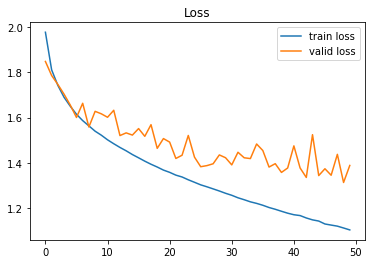

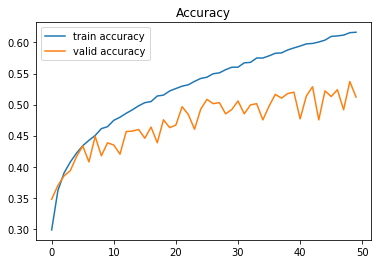

In [17]:
import matplotlib.pyplot as plt

train_loss = model2.history.history["loss"]
valid_loss = model2.history.history["val_loss"]

train_acc = model2.history.history["acc"]
valid_acc = model2.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## AdaGrad

In [7]:
LEARNING_RATE = 0.0005

In [9]:
model3 = build_mlp(input_shape=x_train.shape[1:])
model3.summary()
optimizer = keras.optimizers.Adagrad(lr=LEARNING_RATE)
model3.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [10]:
model3.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.9469 - acc: 0.3052 - val_loss: 1.8512 - val_acc: 0.3386
Epoch 2/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.7828 - acc: 0.3753 - val_loss: 1.7676 - val_acc: 0.3693
Epoch 3/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.7243 - acc: 0.3990 - val_loss: 1.7499 - val_acc: 0.3848
Epoch 4/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.6867 - acc: 0.4112 - val_loss: 1.6955 - val_acc: 0.3959
Epoch 5/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.6602 - acc: 0.4210 - val_loss: 1.6660 - val_acc: 0.4179
Epoch 6/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.6374 - acc: 0.4289 - val_loss: 1.6443 - val_acc: 0.4252
Epoch 7/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.6193 - acc: 0.4355 - val_loss: 1.6395 - val_acc

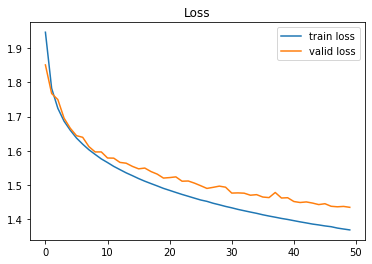

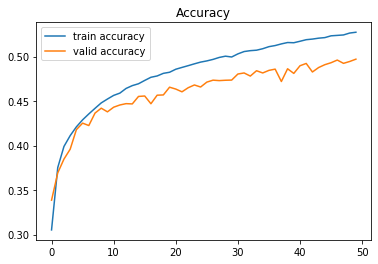

In [12]:
import matplotlib.pyplot as plt

train_loss = model3.history.history["loss"]
valid_loss = model3.history.history["val_loss"]

train_acc = model3.history.history["acc"]
valid_acc = model3.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## Adam

In [7]:
model4 = build_mlp(input_shape=x_train.shape[1:])
model4.summary()
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model4.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [8]:
model4.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 82us/step - loss: 2.9714 - acc: 0.2453 - val_loss: 1.8217 - val_acc: 0.3306
Epoch 2/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.7733 - acc: 0.3576 - val_loss: 1.7330 - val_acc: 0.3659
Epoch 3/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.6949 - acc: 0.3891 - val_loss: 1.7163 - val_acc: 0.3813
Epoch 4/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.6484 - acc: 0.4066 - val_loss: 1.6529 - val_acc: 0.4053
Epoch 5/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.6010 - acc: 0.4215 - val_loss: 1.5915 - val_acc: 0.4282
Epoch 6/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.5781 - acc: 0.4302 - val_loss: 1.5924 - val_acc: 0.4263
Epoch 7/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.5584 - acc: 0.4420 - val_loss: 1.5848 - val_acc

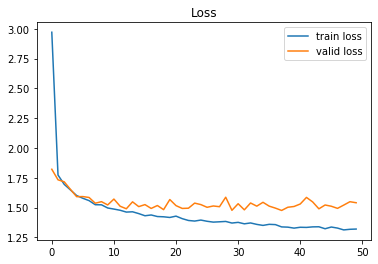

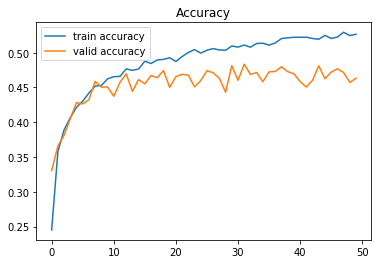

In [9]:
import matplotlib.pyplot as plt

train_loss = model4.history.history["loss"]
valid_loss = model4.history.history["val_loss"]

train_acc = model4.history.history["acc"]
valid_acc = model4.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()